In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
from darts.models import ARIMA
import statsmodels.api as sm


## Time series 
1. Download a price timeseries using an API. The length of the timeseries T, with T=300. The resolution could be any, from tick data to months.  

2. Plot the price time series

In [2]:
#1
def get_stock_data(ticker='AAPL'):
    """ 
    
    """
    end_date = datetime.date.today()
    start_date = end_date + datetime.timedelta(days=-500)
    df = yf.download(tickers=ticker, start=start_date, end=end_date)
    df = df.iloc[-300:,:]
    df.columns = [col + ' Price' for col in df.columns]
    
    return df

In [3]:
#2
def plot_time_series(df, x_col, y_cols=['Close Price'], colors='', title='Apple'):
    _, ax = plt.subplots(1,1, figsize=(8,5), layout='constrained')


    for color, y_col in zip(colors, y_cols):
        print(f'color: {color}')
        print(f'y_col: {y_col}')
        idx = np.isfinite(df[y_col])
        y_arr = df[y_col][idx]

        if x_col == 'Date':
            x_arr = df.index
        else:
            x_arr = df[x_col]
        x_arr = x_arr[idx]
        
        ax.plot(x_arr, y_arr, color=color, lw=1.5, label=y_col)

    ax.set_facecolor('white')
    ax.set_title(title, fontweight='bold', fontsize=14)
    ax.grid(True, 'major', 'both', linestyle='--', lw=.5, c='black', alpha=.7)
    ax.set_xlabel(x_col, fontweight='bold', fontsize=12)
    
    plt.legend(loc='best')
    plt.show()

In [4]:
aapl = get_stock_data()
aapl.shape

[*********************100%***********************]  1 of 1 completed


(300, 6)

color: red
y_col: Close Price


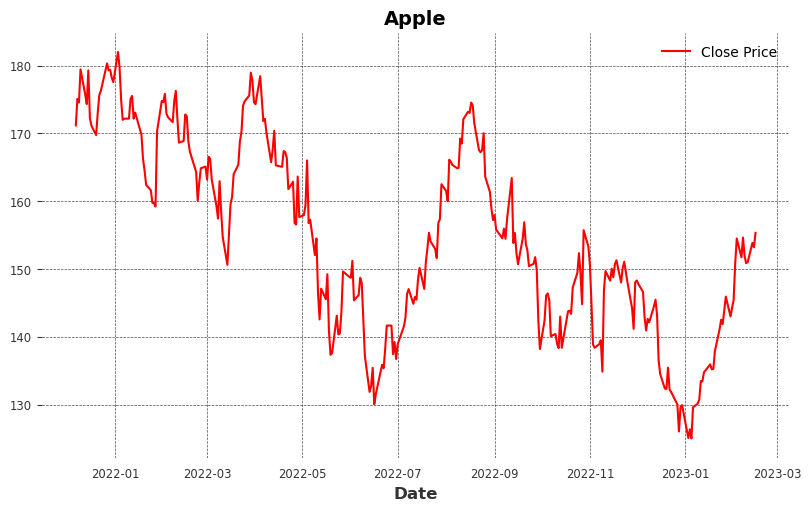

In [5]:
plot_time_series(aapl, x_col='Date', y_cols=['Close Price'], colors=['red'])


## Moving averages
3. Define mathematically the moving average of the price time series with an arbitrary time- window τ 

4. Compute three moving averages of the price timeseries, with time-windows τ=10,20,30 

5. Plot the moving averages against the price time series 

6. Compute the linear and log-return of the price time series 

7. Plot the linear return against the log-return time series

3. 
The moving average (MA) for a time window $\tau$ is defined as $$ MA $$

In [6]:
def moving_average(df, col, window_size):
    return df[col].rolling(window=window_size).mean()

def linear_return(df, col):
    return np.diff( df[col] ) / df[col][1:]

def log_return(df, col):
    return np.log( df[col].shift(1) / df[col] )

/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/3440322403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Moving Avg 10']  = moving_average(aapl,'Close Price', 10)
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/3440322403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Moving Avg 20']  = moving_average(aapl,'Close Price', 20)
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/3440322403.py:3: SettingWithCopyWarning: 
A value is trying to 

color: black
y_col: Close Price
color: red
y_col: Moving Avg 10
color: blue
y_col: Moving Avg 20
color: green
y_col: Moving Avg 30


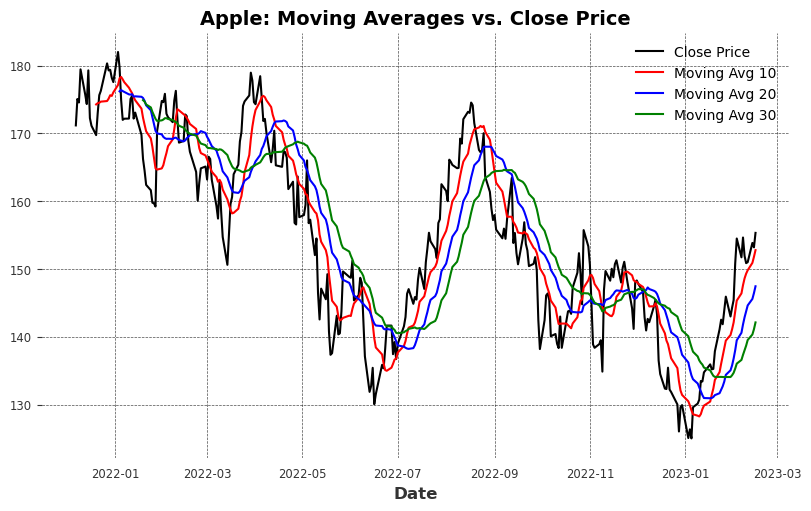

In [7]:
aapl['Moving Avg 10']  = moving_average(aapl,'Close Price', 10)
aapl['Moving Avg 20']  = moving_average(aapl,'Close Price', 20)
aapl['Moving Avg 30']  = moving_average(aapl,'Close Price', 30)

plot_time_series(aapl, x_col='Date', 
                y_cols=['Close Price', 'Moving Avg 10', 'Moving Avg 20', 'Moving Avg 30'], 
                colors=['black','red', 'blue', 'green'], 
                title='Apple: Moving Averages vs. Close Price')

In [8]:
aapl.head()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume Price,Moving Avg 10,Moving Avg 20,Moving Avg 30
Date,,,,,,,,,
2021-12-07,169.080002,171.580002,168.339996,171.179993,169.932755,120405400,NaN,NaN,NaN
2021-12-08,172.130005,175.960007,170.699997,175.080002,173.804382,116998900,NaN,NaN,NaN
2021-12-09,174.910004,176.750000,173.919998,174.559998,173.288147,108923700,NaN,NaN,NaN
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.142532,115402700,NaN,NaN,NaN
2021-12-13,181.119995,182.130005,175.529999,175.740005,174.459564,153237000,NaN,NaN,NaN


/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/290219702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Close Price Linear Return'] = linear_return(aapl, 'Close Price')
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/290219702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Close Price Log Return'] = log_return(aapl, 'Close Price')


color: red
y_col: Close Price Linear Return
color: blue
y_col: Close Price Log Return


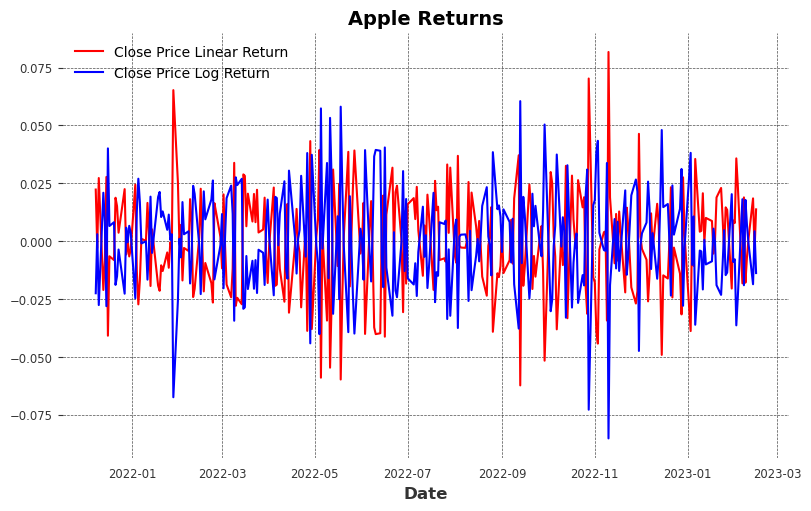

In [9]:
aapl['Close Price Linear Return'] = linear_return(aapl, 'Close Price')
aapl['Close Price Log Return'] = log_return(aapl, 'Close Price')

plot_time_series(aapl, x_col='Date', y_cols=['Close Price Linear Return', 'Close Price Log Return'], title='Apple Returns', colors=['red', 'blue'])

## Time Series Analysis [20 Points]
8. Define the auto-correlation function (for a stationary time-series) 

9. Compute the auto-correlation function (ACF) of the price time series 

10. Plot the price ACF 

11. Compute the partial auto-correlation function (PACF) of the price time series 

12. Plot the price PACF 

13. Compute the auto-correlation function (ACF) of the return time series 

14. Plot the return ACF 

15. Compute the partial auto-correlation function (PACF) of the return time series 

16. Plot the return PACF

In the univariate case, the autocorrelation function ($ACF$) measures the linear predictability between two arbitrary points in time $i$ and $j$. Let $\mathbf{y} = [y_1,\dots,y_T]$ be the time series, then the $ACF$ is defined as:
$$ ACF(y_i, y_j) = \rho (i,j) = \frac{Cov(y_i, y_j)}{\sqrt{Cov(y_i, y_i) Cov(y_j,y_j)} } \forall i, j $$
It is an easy proof to show $ACF \in [-1,1]$. If we can perfectly predict $y_i$ from $y_j$, and vice versa then $ACF = \pm 1$. 
From stationarity $\textbf{reference stationarity}$, we see that the time series is indifferent to its indices $i$ and $j$, but depend only on the absolute difference between these $|i - j|$. Thus, we can take some time index $i$ and set the other index to the shift $ i + s$ so that the function takes the values $y_i$ and $y_{i+s}$. Using this, we can let $\gamma(s) \equiv Cov(y_{i+s}, y_{i}) = \mathbb{E}[(y_{i+s} - \mu)(y_{i} - \mu)]$ be the autocovariance function for a stationary time series. From here, we can see that $\gamma(i+s,i) = Cov(y_{i+s}, y_i) = Cov(y_s, y_0) = \gamma(s,0)$ (from the definition of stationarity). Consequently, we can the we get the following for our $ACF$ given that our time series is stationary:
$$ ACF(s) = \rho(s) = \frac{\gamma(i+s, i)}{\sqrt{\gamma(i+s,i+s)\gamma(i,i)}} = \frac{\gamma(s,0)}{\sqrt{\gamma(s,s)\gamma(0,0)}} = \frac{\gamma(s)}{\sqrt{\gamma(0)^2}} = \frac{\gamma(s)}{\gamma(0)} $$

For the Partial Autocorrelation Function ($PACF$), we remove any linear effect of everything between $y_i$ and $y_j$. Hence, the stationary 

In [10]:
def add_acf(df, col):
    """ 
    
    """
    df['Number of Lags'] = np.arange(df.shape[0]) 
    df[f'{col} ACF'] = sm.tsa.acf(df[col], nlags=df.shape[0])
    return df

def add_pacf(df, col):
    """ 
    
    """

    pacf = sm.tsa.pacf(aapl['Close Price'], nlags=(aapl.shape[0]-1)//2)
    pacf_nan = np.hstack((pacf, np.full(aapl.shape[0] - pacf.shape[0], np.nan)))
    df[f'{col} PACF'] = pacf_nan
    return df


In [11]:
aapl = add_acf(aapl, 'Close Price');
aapl = add_pacf(aapl, 'Close Price');

/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/70320071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Lags'] = np.arange(df.shape[0])
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/70320071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col} ACF'] = sm.tsa.acf(df[col], nlags=df.shape[0])
/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92654/70320071.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

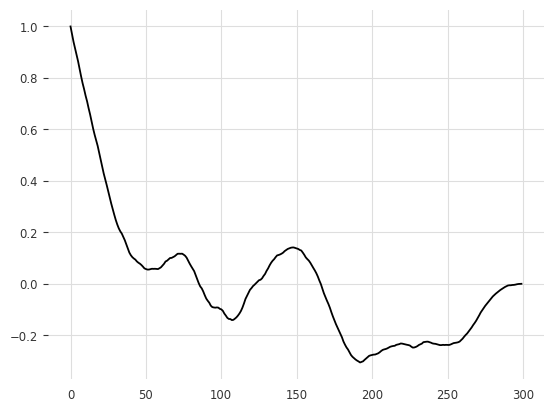

In [12]:
plt.plot(aapl['Number of Lags'], aapl['Close Price ACF'])

In [13]:
aapl.tail()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume Price,Moving Avg 10,Moving Avg 20,Moving Avg 30,Close Price Linear Return,Close Price Log Return,Number of Lags,Close Price ACF,Close Price PACF
Date,,,,,,,,,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,149.313997,143.752999,138.702665,-0.006960,0.006936,295,-0.003067,NaN
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100,149.821997,144.632999,139.534999,0.000927,-0.000928,296,-0.001589,NaN
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,150.906998,145.587499,140.342999,0.018460,-0.018632,297,-0.000560,NaN
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600,151.797998,146.450499,141.118666,-0.004243,0.004234,298,-0.000212,NaN
2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65669300,152.787999,147.456499,142.127332,0.013713,-0.013808,299,0.000172,NaN


color: red
y_col: Close Price ACF


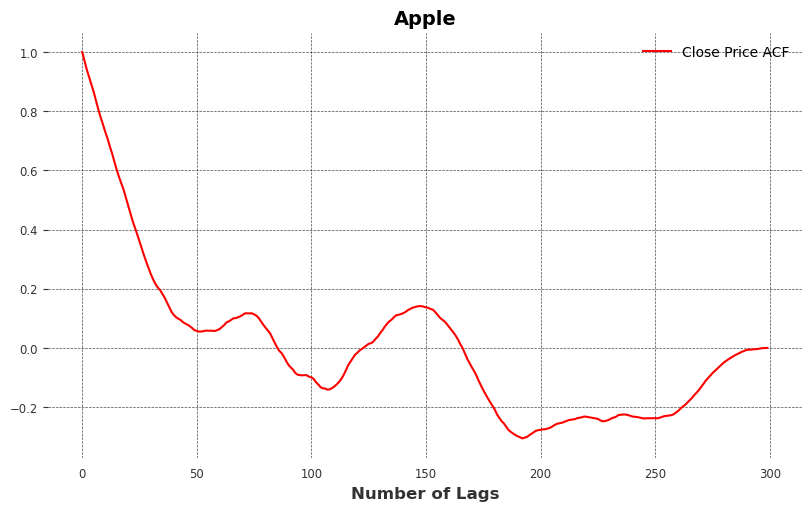

In [14]:
plot_time_series(aapl, x_col='Number of Lags', y_cols=['Close Price ACF'], colors=['red'])

color: r
y_col: Close Price PACF


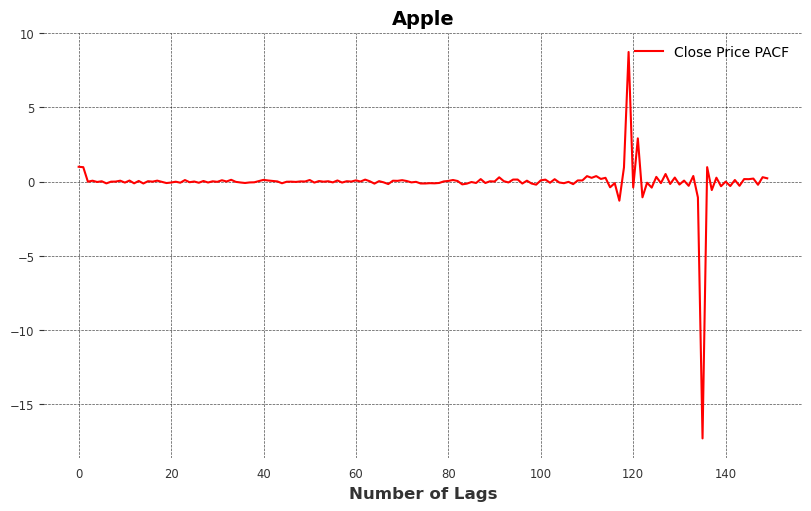

In [15]:
plot_time_series(aapl, x_col='Number of Lags', y_cols=['Close Price PACF'], colors='red')

## ARMA models
17. Define mathematically an ARMA(p,q) model 

18. Define a training and test set and fit an ARMA model to the price time series 

19. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set 

20. Plot the price time series vs the ARMA forecast in the test set 

21. Fit an ARMA model to the return time series 

22. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set 

23. Plot the return time series vs the ARMA forecast in the test set

In [16]:
aapl.head()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume Price,Moving Avg 10,Moving Avg 20,Moving Avg 30,Close Price Linear Return,Close Price Log Return,Number of Lags,Close Price ACF,Close Price PACF
Date,,,,,,,,,,,,,,
2021-12-07,169.080002,171.580002,168.339996,171.179993,169.932755,120405400,NaN,NaN,NaN,NaN,NaN,0,1.000000,1.000000
2021-12-08,172.130005,175.960007,170.699997,175.080002,173.804382,116998900,NaN,NaN,NaN,0.022276,-0.022527,1,0.969871,0.973115
2021-12-09,174.910004,176.750000,173.919998,174.559998,173.288147,108923700,NaN,NaN,NaN,-0.002979,0.002975,2,0.940369,-0.005129
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.142532,115402700,NaN,NaN,NaN,0.027250,-0.027628,3,0.915013,0.062083
2021-12-13,181.119995,182.130005,175.529999,175.740005,174.459564,153237000,NaN,NaN,NaN,-0.021111,0.020891,4,0.889134,-0.023410


In [17]:
import darts
aapl = aapl.reset_index(drop=True)
aapl_time_series = darts.TimeSeries.from_dataframe(aapl)
close_price_time_series = aapl_time_series['Close Price']
linear_return_time_series = aapl_time_series['Close Price Linear Return']
len(close_price_time_series), len(linear_return_time_series)

(300, 300)

In [18]:
close_price_train, close_price_test = close_price_time_series.split_before(0.9)
linear_return_train, linear_return_test = linear_return_time_series.split_before(0.9)
print('Test and train should be equal below:\n')
print(f"Length of training sets: close price = {len(close_price_train)}, linear return = {len(linear_return_train)}")
print(f"Length of test sets: close price = {len(close_price_test)}, linear return = {len(linear_return_test)}")

Test and train should be equal below:

Length of training sets: close price = 269, linear return = 269
Length of test sets: close price = 31, linear return = 31


In [19]:
from darts import metrics 

In [20]:
parameters = {
    "p" : [1,2,3,10,20,30],
    "d" : [0],
    "q" : [1,2,3,4,10,20,30,40],
}
result_close_price = ARIMA.gridsearch(series=close_price_train,
                          parameters=parameters,
                          val_series=close_price_test,
                          n_jobs=-1,
                          metric=metrics.mse)

result_linear_return = ARIMA.gridsearch(series=linear_return_train,
                          parameters=parameters,
                          val_series=linear_return_test,
                          n_jobs=-1,
                          metric=metrics.mse)

/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

In [21]:
print(result_close_price)
print(result_linear_return)

(<darts.models.forecasting.arima.ARIMA object at 0x18c49dac0>, {'p': 2, 'd': 0, 'q': 30}, 15.382550645512861)
(<darts.models.forecasting.arima.ARIMA object at 0x18c570250>, {'p': 3, 'd': 0, 'q': 30}, 0.0002692399403324151)


In [27]:
arima_close_price = ARIMA(p=result_close_price[1]['p'], d=0, q=result_close_price[1]['q'])
arima_close_price.fit(series=close_price_train)

arima_linear_return = ARIMA(p=result_linear_return[1]['p'], d=0, q=result_linear_return[1]['q'])
arima_linear_return.fit(series=linear_return_train)

/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
pred_close_price = arima_close_price.predict(n=len(close_price_test))
pred_linear_return = arima_linear_return.predict(n=len(linear_return_test))

Text(0.5, 1.0, 'ARMA model Close Price: p=2, q=30')

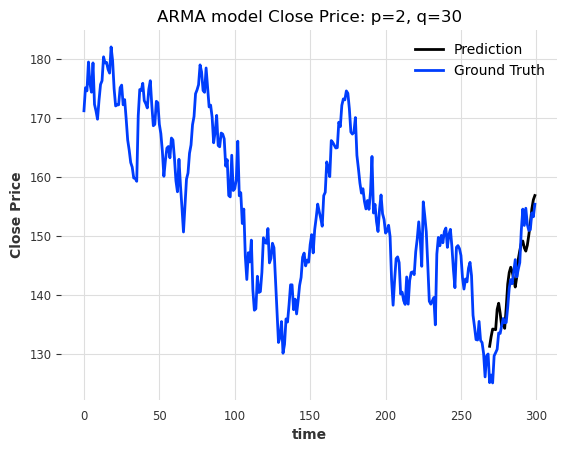

In [29]:
pred_close_price.plot(label='Prediction')
close_price_time_series.plot(label='Ground Truth')
plt.ylabel('Close Price')
plt.title(f'ARMA model Close Price: p={result_close_price[1]["p"]}, q={result_close_price[1]["q"]}')

Text(0.5, 1.0, 'ARMA model Linear Return: p=3, q=30')

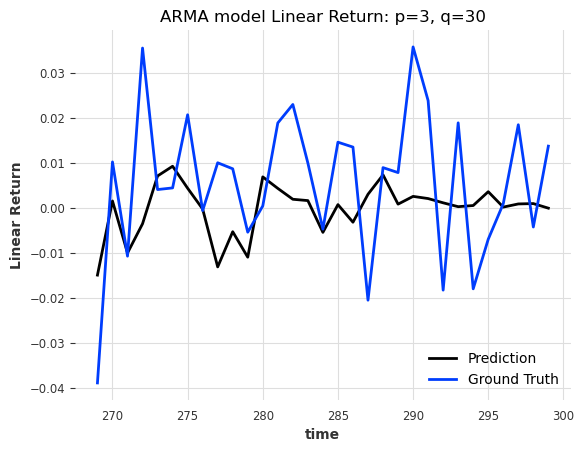

In [31]:
pred_linear_return.plot(label='Prediction')
linear_return_test.plot(label='Ground Truth')
plt.ylabel('Linear Return')
plt.title(f'ARMA model Linear Return: p={result_linear_return[1]["p"]}, q={result_linear_return[1]["q"]}')

## Gaussianity and Stationarity test [20 Points]

24. Introduce mathematically a Gaussianity test 

25. Perform a Gaussianity test of the return time series 

26. Introduce mathematically a stationarity test 

27. Perform a stationarity test of the return time series

When we forecast time series, we are assessing certain assumption to what we expect in the future. Now, time series are non-deterministic so that we cannot assess with certainty what will happen in the future. However, stationarity can help mitigate the difficulty of forecasting. Stationarity implies that the properties of the time series do not change with time. E.g., the mean, variance, autocorrelation, and so on stay constant with time. We have two types of stationarity,
1. **Strict Stationarity**: A time series $\set{y_t , t \in \mathbb{Z}}$ is strictly stationary if $P(y_1,\dots,y_T) = P(y_{1+s},\dots,y_{t+s})$ for some shift $s$ in time. This means the joint distribution stays the same, regardless of shifting the time stamp (i.e., it only depends on the differences in time). To most applications, this is too strong of an assumption. 
2. **Weak Stationarity**: A time series $\set{y_t , t \in \mathbb{Z}}$ is weakly stationary if:
* $\mathbb{E}[y_t^2] < \infty, \forall t \in \mathbb{Z}$
* $\mathbb{E}[y_t] = \mu_t, \forall t \in \mathbb{Z}$ 
* $Cov(y_i,y_j) = Cov( y_{i+s}, y_{j+s} ) \forall i, j$ given some shift $s$ 

This means the time series must exhibit a finite variance, constant mean, and that the covariance only depends on the difference $|i - j|$ not on the choices of $i$ and $j$. It is important to see that strict stationarity $\nRightarrow$ weak stationarity as it does not assume finite variance. Now, if the time series is Gaussian then weak stationarity imples strict stationarity as a Gaussian distribution is characterized by its first two moments - $N(\mu, \sigma^2)$